_LEARNING-CIRCLE-24 PROJECT_

<h2> Learning-Circle-24 </h2> <p>  Contributors </p>



In [1]:
import pandas as pd

In [2]:
# Set display option 
pd.set_option('display.max.columns', None)

In [5]:
# Load the dataset
chicago_crime_df= pd.read_csv('datasets/chicago1.csv')

In [6]:
chicago_crime_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [7]:
chicago_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1000 non-null   int64  
 1   ID                    1000 non-null   int64  
 2   Case Number           1000 non-null   object 
 3   Date                  1000 non-null   object 
 4   Block                 1000 non-null   object 
 5   IUCR                  1000 non-null   object 
 6   Primary Type          1000 non-null   object 
 7   Description           1000 non-null   object 
 8   Location Description  999 non-null    object 
 9   Arrest                1000 non-null   bool   
 10  Domestic              1000 non-null   bool   
 11  Beat                  1000 non-null   int64  
 12  District              1000 non-null   float64
 13  Ward                  919 non-null    float64
 14  Community Area        919 non-null    float64
 15  FBI Code              

### Data Cleaning

__1. Use a funtion to Drop redundant columns (a redundant colum is one that gives infromation that another column already explains: eg ID and Case number)__

In [8]:
# Dropping redundant columns
def drop_redundant_columns(df):
    redundant_columns = ['Unnamed: 0','ID', 'Location','Updated On','X Coordinate','Y Coordinate','Community Area','IUCR']
    df.drop(redundant_columns, axis=1, inplace= True)

In [9]:
drop_redundant_columns(chicago_crime_df)

__Reasons for dropping the above columns__
- 'Unnamed: 0': Its just an index for individual row
- 'ID': Unique identifier for the record which is redundant due to the presence of 'Case Number'
- 'Location': This is where the incident occurred in a format that allows for creation of maps and other geographic operation. It's the combination of both latitude and longitude feature of this dataset thus, not required.
- 'Updated On': Holds the date and time the record was last updated.Which is not required for our analysis.
- 'X Coordinate': The x coordinate is a shifted location from the actual location for partial redaction but falls on the same block. Since we have a longitude/latitude and the block where the crime happened, we can neglect this feature.
- 'Y Coordinate': The y coordinate is a shifted location from the actual location for partial redaction but falls on the same block. Since we have a longitude/latitude and the block where the crime happened, we can neglect this feature.
- 'Community Area': This indicates the community area where the incident occurred. Which is not neccessary for our analysis.
- 'IUCR': This is the Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description, it provides information about the primary type and description of crime. Since primary type and description features already exist, it becomes a redundant column


In [10]:
chicago_crime_df.head()

,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Year,Latitude,Longitude
0,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,14,2008,41.739980,-87.555120
1,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,15,2018,41.726922,-87.599747
2,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,05,2007,41.994138,-87.734959
3,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,08A,2018,41.881217,-87.730590
4,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,04A,2021,41.874174,-87.668082


### Handling missing values

In [11]:
chicago_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Case Number           1000 non-null   object 
 1   Date                  1000 non-null   object 
 2   Block                 1000 non-null   object 
 3   Primary Type          1000 non-null   object 
 4   Description           1000 non-null   object 
 5   Location Description  999 non-null    object 
 6   Arrest                1000 non-null   bool   
 7   Domestic              1000 non-null   bool   
 8   Beat                  1000 non-null   int64  
 9   District              1000 non-null   float64
 10  Ward                  919 non-null    float64
 11  FBI Code              1000 non-null   object 
 12  Year                  1000 non-null   int64  
 13  Latitude              992 non-null    float64
 14  Longitude             992 non-null    float64
dtypes: bool(2), float64(4)

In [12]:
chicago_crime_df.isnull().sum()

Case Number              0
Date                     0
Block                    0
Primary Type             0
Description              0
Location Description     1
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                    81
FBI Code                 0
Year                     0
Latitude                 8
Longitude                8
dtype: int64

__Missing value Percentage__

In [13]:
def missing_value_percentage(df):
    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean().reset_index()
    missing_percentage.columns = ['Column', 'Missing Percentage']

    # Convert the proportion to percentage by multiplying by 100
    missing_percentage['Missing Percentage'] *= 100

    return missing_percentage


In [14]:
missing_value_percentage(chicago_crime_df)

,Column,Missing Percentage
0,Case Number,0.0
1,Date,0.0
2,Block,0.0
3,Primary Type,0.0
4,Description,0.0
5,Location Description,0.1
6,Arrest,0.0
7,Domestic,0.0
8,Beat,0.0
9,District,0.0


- __Handling Missing values for the ward Column__

In [15]:
# Using the mode to fill up the most common Ward, then replace it with the current Ward column
most_fq_ward = chicago_crime_df.Ward.mode()[0] # indexing the mode to get the value as it returns a series
chicago_crime_df.Ward = chicago_crime_df.Ward.fillna(most_fq_ward)

In [16]:
chicago_crime_df.isna().sum()

Case Number             0
Date                    0
Block                   0
Primary Type            0
Description             0
Location Description    1
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
FBI Code                0
Year                    0
Latitude                8
Longitude               8
dtype: int64

- __Handling Missing values for the latitude and Longitude Column__ (Using Assosciation) <br>
    - The assumption here is that the latitude and longitude readings are points that show exact location, are closer to eachother within a district. if they are, we can group our data by districts and fill up missing Latitide and longitude values by the median or mode.

In [17]:
chicago_crime_df.District.unique()

array([ 4., 17., 11., 12.,  2., 15., 25., 14.,  8.,  6., 19.,  1.,  7.,
       20., 18.,  3.,  9., 22.,  5., 16., 10., 24., 31.])

In [18]:
chicago_crime_df.groupby('District').get_group(17)[['Longitude', 'Latitude']]

,Longitude,Latitude
2,-87.734959,41.994138
39,-87.724435,41.969395
47,-87.702085,41.946649
61,-87.711568,41.949382
78,-87.711739,41.939300
102,-87.724774,41.940298
122,-87.712670,41.945238
139,-87.711475,41.992542
147,-87.727902,41.963596
163,-87.726081,41.953669


There appears to be closeness in Latitude points when data is grouped based on districts, we can group based on district and fill up with median or mode.

In [19]:
chicago_crime_df['Latitude'] = chicago_crime_df.groupby('District')['Latitude'].transform(lambda x: x.fillna(x.median()))
chicago_crime_df['Longitude'] = chicago_crime_df.groupby('District')['Longitude'].transform(lambda x: x.fillna(x.median()))

In [20]:
chicago_crime_df.isna().sum()

Case Number             0
Date                    0
Block                   0
Primary Type            0
Description             0
Location Description    1
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
FBI Code                0
Year                    0
Latitude                0
Longitude               0
dtype: int64

In [21]:
chicago_crime_df.head()

,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Year,Latitude,Longitude
0,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,14,2008,41.739980,-87.555120
1,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,15,2018,41.726922,-87.599747
2,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,05,2007,41.994138,-87.734959
3,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,08A,2018,41.881217,-87.730590
4,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,04A,2021,41.874174,-87.668082


__2. Use functions to create new columns for Months, Day, Season.__

In [21]:
from datetime import datetime

In [22]:
# Create new columns for Months
def extract_and_map_month(date):
    # ensure the input is in datetime format
    # 07/26/2008 02:30:00 PM
    date_column = pd.to_datetime(date, format='%m/%d/%Y %I:%M:%S %p')

    month_names = date_column.dt.month_name()
# dt is an attribute of the date column object
# month_name() is a method
    return month_names

In [23]:
chicago_crime_df['Month'] = extract_and_map_month(chicago_crime_df['Date'])

In [24]:
chicago_crime_df.head()

,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Year,Latitude,Longitude,Month
0,HK742237,10/25/2004 12:00:00 AM,008XX N HOMAN AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1121,11.0,27.0,26,2004,41.896706,-87.711477,October
1,HJ837008,12/24/2003 08:30:00 PM,061XX N AVERS AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,1711,17.0,39.0,05,2003,41.992925,-87.725156,December
2,HL132238,01/18/2005 11:11:31 PM,045XX N MILWAUKEE AVE,BATTERY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,RESIDENCE,False,True,1623,16.0,45.0,04B,2005,41.964083,-87.757467,January
3,HK707251,10/24/2004 03:05:00 PM,012XX W BELMONT AVE,CRIMINAL DAMAGE,TO PROPERTY,OTHER,True,False,1932,19.0,32.0,14,2004,41.939824,-87.660005,October
4,G247242,04/30/2001 05:52:55 PM,027XX W 23 PL,BATTERY,SIMPLE,STREET,False,False,1034,10.0,27.0,08B,2001,41.849310,-87.693045,April


In [25]:
# Create new columns for Day
def extract_and_map_month(date):
    # ensure the input is in datetime format
    # 07/26/2008 02:30:00 PM
    date_column = pd.to_datetime(date, format='%m/%d/%Y %I:%M:%S %p')

    day_names = date_column.dt.day_name()
# dt is an attribute of the date column object
# month_name() is a method
    return day_names

In [26]:
chicago_crime_df['Day'] = extract_and_map_month(chicago_crime_df['Date'])

In [27]:
chicago_crime_df.head()

,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Year,Latitude,Longitude,Month,Day
0,HK742237,10/25/2004 12:00:00 AM,008XX N HOMAN AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1121,11.0,27.0,26,2004,41.896706,-87.711477,October,Monday
1,HJ837008,12/24/2003 08:30:00 PM,061XX N AVERS AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,1711,17.0,39.0,05,2003,41.992925,-87.725156,December,Wednesday
2,HL132238,01/18/2005 11:11:31 PM,045XX N MILWAUKEE AVE,BATTERY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,RESIDENCE,False,True,1623,16.0,45.0,04B,2005,41.964083,-87.757467,January,Tuesday
3,HK707251,10/24/2004 03:05:00 PM,012XX W BELMONT AVE,CRIMINAL DAMAGE,TO PROPERTY,OTHER,True,False,1932,19.0,32.0,14,2004,41.939824,-87.660005,October,Sunday
4,G247242,04/30/2001 05:52:55 PM,027XX W 23 PL,BATTERY,SIMPLE,STREET,False,False,1034,10.0,27.0,08B,2001,41.849310,-87.693045,April,Monday


In [28]:
# Function to define various month and their corresponding season
def get_season(month):
    if month in ['December','January','February']:
        return 'Winter'
    elif month in ['March','April','May']:
        return 'Spring'
    elif month in ['June','July','August']:
        return 'Summer'
    else:
        return 'Fall'

In [29]:
chicago_crime_df['Season'] = chicago_crime_df['Month'].apply(get_season)

In [30]:
chicago_crime_df.head()

,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Year,Latitude,Longitude,Month,Day,Season
0,HK742237,10/25/2004 12:00:00 AM,008XX N HOMAN AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1121,11.0,27.0,26,2004,41.896706,-87.711477,October,Monday,Fall
1,HJ837008,12/24/2003 08:30:00 PM,061XX N AVERS AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,1711,17.0,39.0,05,2003,41.992925,-87.725156,December,Wednesday,Winter
2,HL132238,01/18/2005 11:11:31 PM,045XX N MILWAUKEE AVE,BATTERY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,RESIDENCE,False,True,1623,16.0,45.0,04B,2005,41.964083,-87.757467,January,Tuesday,Winter
3,HK707251,10/24/2004 03:05:00 PM,012XX W BELMONT AVE,CRIMINAL DAMAGE,TO PROPERTY,OTHER,True,False,1932,19.0,32.0,14,2004,41.939824,-87.660005,October,Sunday,Fall
4,G247242,04/30/2001 05:52:55 PM,027XX W 23 PL,BATTERY,SIMPLE,STREET,False,False,1034,10.0,27.0,08B,2001,41.849310,-87.693045,April,Monday,Spring


__3. Use subsetting and grouping to show how the frequency of crime is distributed within Months, Days, Seasons with the most crime record and what crimes are highest and lowest?__

 a. __Monthly Crime Frequency Distribution__

In [31]:
crime_count_by_month = chicago_crime_df.groupby('Month').size()

In [32]:
crime_count_by_month

Month
April        89
August       89
December     77
February     70
January      81
July         94
June         81
March        68
May          85
November     76
October      97
September    93
dtype: int64

- __Month with the highest crime count__

In [33]:
highest_crime_month = crime_count_by_month.idxmax()
highest_crime_count = crime_count_by_month.max()
print(f"The month with the highest crime count is: {highest_crime_month} with a Crime count: {highest_crime_count}" )

The month with the highest crime count is: October with a Crime count: 97


- __Month with the lowest crime count__

In [34]:
lowest_crime_month = crime_count_by_month.idxmin()
lowest_crime_count = crime_count_by_month.min()
print(f"The month with the lowest crime count is: {lowest_crime_month} with a Crime count: {lowest_crime_count}", )

The month with the lowest crime count is: March with a Crime count: 68


- __Highest Crime Type in a Month__ 

In [35]:
# group by month and crime type,count occurrence
crime_type_counts_by_month = chicago_crime_df.groupby(['Month','Primary Type']).size()


# Find the most common crime type and its occurence in a month
most_common_crime_by_month = crime_type_counts_by_month.idxmax()
highest_crime_count_by_month = crime_type_counts_by_month.max()

month, crime = most_common_crime_by_month
crime_count = highest_crime_count_by_month
print(f"The highest crime type in a month is: {crime} and it occurred: {crime_count} time(s) in {month}.")


The highest crime type in a month is: THEFT and it occurred: 27 time(s) in July.


- __Lowest Crime Type in a Month__ 

In [36]:
# group by month and crime type,count occurrence
crime_type_counts_by_month = chicago_crime_df.groupby(['Month','Primary Type']).size()


# Find the least common crime type and its occurence in a month
least_common_crime_by_month = crime_type_counts_by_month.idxmin()
lowest_crime_count_by_month = crime_type_counts_by_month.min()

month, crime = least_common_crime_by_month
crime_count = lowest_crime_count_by_month
print(f"The least Crime Type in a month is: {crime} and it occurred: {crime_count} time(s) in {month}.")

The least Crime Type in a month is: OFFENSE INVOLVING CHILDREN and it occurred: 1 time(s) in April.


b. __Daily Crime Frequency__

In [37]:
crime_count_per_day = chicago_crime_df.groupby('Day')['Day'].count()

In [38]:
crime_count_per_day

Day
Friday       136
Monday       157
Saturday     141
Sunday       134
Thursday     137
Tuesday      150
Wednesday    145
Name: Day, dtype: int64

- __Day with the highest crime count__

In [39]:
highest_crime_day = crime_count_per_day.idxmax()
highest_crime_count = crime_count_per_day.max()
print(f"The day with the highest crime count is: {highest_crime_day} with a Crime count: {highest_crime_count}" )

The day with the highest crime count is: Monday with a Crime count: 157


- __Day with the lowest crime count__

In [40]:
lowest_crime_day = crime_count_per_day.idxmin()
lowest_crime_count = crime_count_per_day.min()
print(f"The day with the lowest crime count is: {lowest_crime_day} with a crime count: {lowest_crime_count}" )

The day with the lowest crime count is: Sunday with a crime count: 134


- __Highest Crime Type in a Day__

In [41]:
# group by day and crime type,count occurrence
crime_type_counts_per_day = chicago_crime_df.groupby(['Day','Primary Type']).size()


# Find the most common crime type and its occurence in a day
most_common_crime_per_day = crime_type_counts_per_day.idxmax()
highest_crime_count_per_day = crime_type_counts_per_day.max()

day, crime = most_common_crime_per_day
crime_count = highest_crime_count_per_day
print(f"The highest crime type in a day is: {crime} and it occurred: {crime_count} time(s) on {day}.")


The highest crime type in a day is: THEFT and it occurred: 35 time(s) on Monday.


- __Least Crime Type in a Day__

In [42]:
# group by day and crime type,count occurrence
crime_type_counts_per_day = chicago_crime_df.groupby(['Day','Primary Type']).size()


# Find the most common crime type and its occurence in a day
least_common_crime_per_day = crime_type_counts_per_day.idxmin()
lowest_crime_count_per_day = crime_type_counts_per_day.min()

day, crime = least_common_crime_per_day
crime_count = lowest_crime_count_per_day
print(f"The lowest Crime type in a day is: {crime} and it occurred: {crime_count} time(s) on {day}.")


The lowest Crime type in a day is: INTERFERENCE WITH PUBLIC OFFICER and it occurred: 1 time(s) on Friday.


c. __Seasonal Crime Frequency__

In [43]:
crime_count_by_season = chicago_crime_df.groupby('Season')['Season'].count()

In [44]:
crime_count_by_season

Season
Fall      266
Spring    242
Summer    264
Winter    228
Name: Season, dtype: int64

- __Season with the highest crime count__

In [45]:
highest_crime_season = crime_count_by_season.idxmax()
highest_crime_count = crime_count_by_season.max()
print(f"The season with the highest crime count is: {highest_crime_season} with a Crime count: {highest_crime_count}" )

The season with the highest crime count is: Fall with a Crime count: 266


- __Season with the lowest crime count__

In [46]:
lowest_crime_season = crime_count_by_season.idxmin()
lowest_crime_count = crime_count_by_season.min()
print(f"The season with the highest crime count is: {lowest_crime_season} with a Crime count: {lowest_crime_count}" )

The season with the highest crime count is: Winter with a Crime count: 228


- __Highest Crime Type in a Season__

In [47]:
# group by day and crime type,count occurrence
crime_type_counts_by_season = chicago_crime_df.groupby(['Season','Primary Type']).size()


# Find the most common crime type and its occurence in a season
most_common_crime_by_season = crime_type_counts_by_season.idxmax()
highest_crime_count_by_season = crime_type_counts_by_season.max()

season, crime = most_common_crime_by_season
crime_count = highest_crime_count_by_season
print(f"The highest crime type in a season is: {crime} and it occurred: {crime_count} time(s) in {season}.")


The highest crime type in a season is: BATTERY and it occurred: 61 time(s) in Fall.


- __Lowest Crime Type in a Season__

In [48]:
# group by day and crime type,count occurrence
crime_type_counts_by_season = chicago_crime_df.groupby(['Season','Primary Type']).size()


# Find the most common crime type and its occurence in a season
least_common_crime_by_season = crime_type_counts_by_season.idxmin()
lowest_crime_count_by_season = crime_type_counts_by_season.min()

season, crime = least_common_crime_by_season
crime_count = lowest_crime_count_by_season
print(f"The lowest crime type in a season is: {crime} and it occurred: {crime_count} time(s) in {season}.")


The lowest crime type in a season is: ARSON and it occurred: 1 time(s) in Fall.


__4. According to location description, where does crime happen the most?__

In [49]:
# Location description where crime happens the most
most_common_crime_location = chicago_crime_df['Location Description'].value_counts().idxmax()

In [50]:
most_common_crime_location

'STREET'

According to location description, most crime happen in the __STREET__.

In [51]:
chicago_crime_df.head()

,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Year,Latitude,Longitude,Month,Day,Season
0,HK742237,10/25/2004 12:00:00 AM,008XX N HOMAN AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1121,11.0,27.0,26,2004,41.896706,-87.711477,October,Monday,Fall
1,HJ837008,12/24/2003 08:30:00 PM,061XX N AVERS AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,1711,17.0,39.0,05,2003,41.992925,-87.725156,December,Wednesday,Winter
2,HL132238,01/18/2005 11:11:31 PM,045XX N MILWAUKEE AVE,BATTERY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,RESIDENCE,False,True,1623,16.0,45.0,04B,2005,41.964083,-87.757467,January,Tuesday,Winter
3,HK707251,10/24/2004 03:05:00 PM,012XX W BELMONT AVE,CRIMINAL DAMAGE,TO PROPERTY,OTHER,True,False,1932,19.0,32.0,14,2004,41.939824,-87.660005,October,Sunday,Fall
4,G247242,04/30/2001 05:52:55 PM,027XX W 23 PL,BATTERY,SIMPLE,STREET,False,False,1034,10.0,27.0,08B,2001,41.849310,-87.693045,April,Monday,Spring


__5. Did the Types of crime change as years go by? if yes/no. let the data show the insight.__

In [52]:
# creates\ a pivot table that shows the count of crimes for each combination of year and crime type in the Chicago crime dataset. 
# The resulting DataFrame has years as rows, crime types as columns, the count of crimes as the values in the cells and fills any missing value with 0.
crime_by_year_type = chicago_crime_df.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)
crime_by_year_type

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,INTERFERENCE WITH PUBLIC OFFICER,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PROSTITUTION,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,THEFT,WEAPONS VIOLATION
Year,,,,,,,,,,,,,,,,,,,,,
2001,0,4,11,2,0,5,2,4,0,0,0,4,5,0,4,0,0,2,0,10,0
2002,0,7,7,2,0,4,5,1,0,0,0,4,10,0,5,0,0,2,0,11,1
2003,0,6,9,7,0,10,1,4,0,0,0,3,8,2,9,2,0,1,0,17,1
2004,0,4,11,3,0,9,3,1,0,0,0,6,3,1,7,2,0,2,0,13,0
2005,0,6,15,2,0,8,1,1,0,0,1,2,9,0,5,0,0,6,0,11,0
2006,0,4,15,2,1,9,1,2,0,1,0,3,8,0,3,3,0,4,0,9,1
2007,0,3,10,1,0,7,2,4,0,0,0,2,10,1,6,0,0,0,0,12,1
2008,0,2,10,2,0,7,1,3,0,0,0,2,5,1,4,1,0,2,0,9,1
2009,0,3,9,3,0,10,0,1,0,0,0,3,7,0,1,0,0,1,0,11,0


Yes, the type of crime changed as the years goes by as evident above. Although, a line plot can be used to visualize this trend, but it will result into a noisy plot.

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

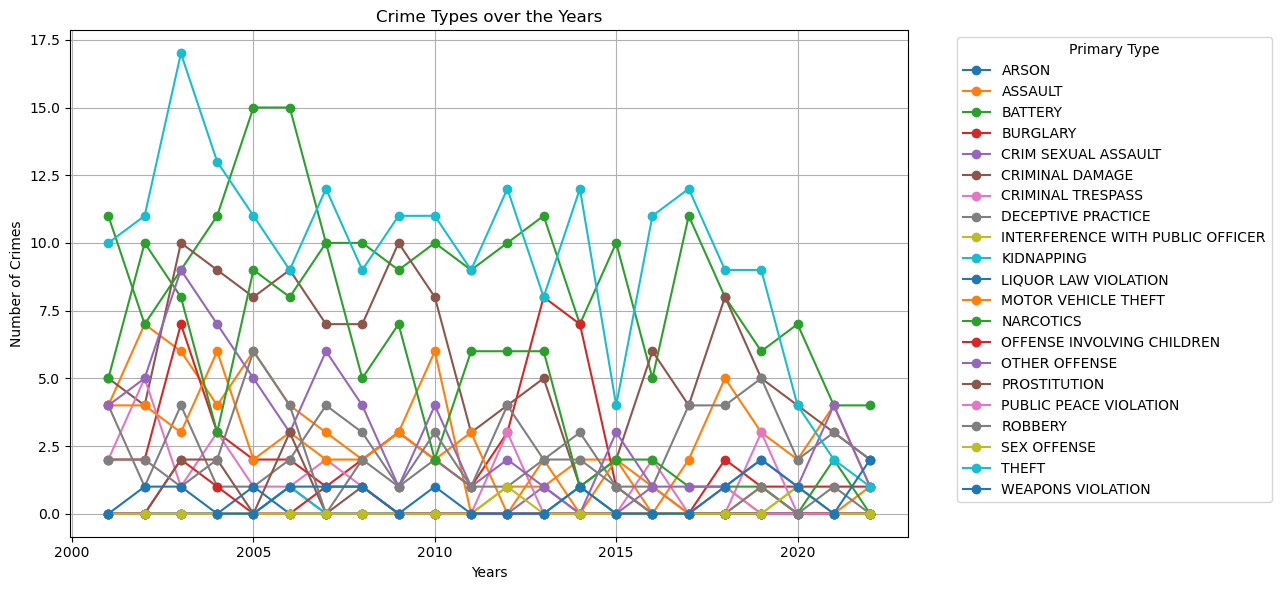

In [54]:
crime_by_year_type.plot(kind="line", marker="o", figsize=(13,6))
plt.title("Crime Types over the Years")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")
plt.legend(title="Primary Type", bbox_to_anchor=(1.05,1), loc="upper left")
plt.grid(True)
plt.tight_layout()


In [55]:
# Convert the date column to datetime format
chicago_crime_df['Date'] = pd.to_datetime(chicago_crime_df['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Sort the DataFrame by date in ascending order
chicago_crime_df_sorted = chicago_crime_df.sort_values(by='Date')
crime_count_pivot_table = pd.pivot_table(chicago_crime_df_sorted, index = 'Date', columns = 'Primary Type', aggfunc = 'size', fill_value = 0)
crime_count_pivot_table

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,INTERFERENCE WITH PUBLIC OFFICER,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PROSTITUTION,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-08 12:00:00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2001-01-15 00:01:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2001-01-15 15:00:00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2001-01-24 21:30:00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2001-01-29 17:35:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 19:25:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2022-07-19 00:02:00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-07-19 11:30:00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


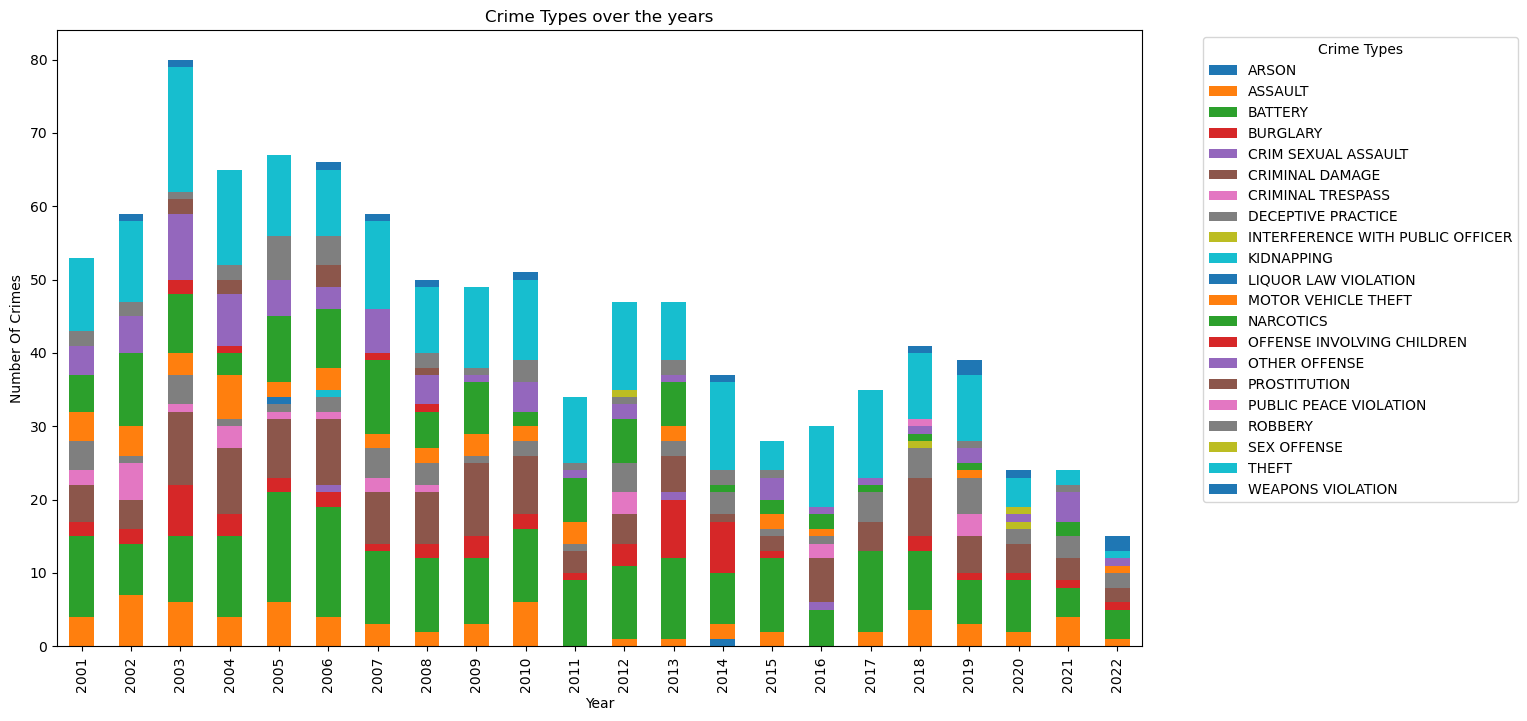

In [58]:
crime_by_year_type.plot(kind = 'bar', stacked = True, figsize=(14,8))
plt.title('Crime Types over the years')
plt.xlabel('Year')
plt.ylabel('Number Of Crimes')
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left', title='Crime Types')